# Introduction to the project


Welcome to this notebook on German Credit Prediction Problem

# Objective of the Project

The main objectives of the German Credit project is to:

(1) Select most relevant features to determine whether a borrower is creditworthy or not

(2) Modelling to predict whether borrower has good or bad credit - and surprisingly, MY MODEL'S ACCURACY IS 84% ON TESTING DATA

This is a standard supervised classification task.
A classification problem where we have to predict whether a loan would be approved or not. 

Credit check n is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

# Workflow

This notebook is divided into the below sections following the CRISP-DM process model:

1.Business understanding

2.Data understanding

3.Data Preparation

4.Modelling

5.Evalution

6.Deployment

# Table of Contents

Let’s look at the steps that we will follow in this notebook.

1.Problem Statement

2.Hypothesis Generation

3.Loading the data

4.Understanding the data

5.Exploratory Analysis

6.Data cleaning - missing value and outlier treatment

7.Feature Engineering

8.Feature Selection

9.Model Building :
    
i)Logistic Regression using sklearn

ii) Logistic Regression using statsmodel

iii) Linear Regression using sklearn

iv) Linear Regression using statsmodel

v) Regression tree

iv) Compare regression models by mean square errors 


# Section 1. Business Understanding


#### <a name="credit_risk"> Credit risk</a>
Credit Risk is the  risk of loss resulting from a borrower's failure to repay a loan

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision 

#### <a name="credit_risk_types">Types of Credit Risk</a>           
 __Good Risk__:   often refers to a loan made to a creditworthy person or company. 

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
 
 __Bad Risk__: A loan that is unlikely to be repaid because of bad credit history, lack of income, or some other reason.

If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank


Objective of Analysis:

Minimization of risk and maximization of profit on behalf of the bank.

To minimize loss from the bank’s perspective, the bank needs to decide who to give approval of the loan and who not to. An applicant’s  profiles are considered by loan managers before a decision is taken regarding his/her loan application.

## Hypothesis Generation

After looking at the business understanding, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

Below are some of the factors which I think can affect the Creditability (dependent variable for this loan prediction problem):

Account Balance: Applicants with high existng account balance should have more chances of loan approval.

Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval.

Credit amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Duration of credit: Loan for less time period and less amount should have higher chances of approval.

Age: Middle-age people should have better chance of paying back the loan


EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable.

So we will pose three main questions as below:

(1) What factors would significantly contribute to decision of loan approval?

(2) How can we predict if a person should get a loan or not based on the built model?

(3) How can we assess our model's performance in loan prediction?

### About The Data:

The dataset contains 1000 entries with 20 independent variables (7 numerical, 13 categorical variables which were converted to numerical format) and 1 target variable prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as creditworthy or not 

Independent Variables

Attribute 1: (qualitative) Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical) Duration in month

Attribute 3: (qualitative) Credit history
A30 : no credits taken/all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/other credits existing (not at this bank)

Attribute 4: (qualitative) Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : vacation
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical) Credit amount
Attibute 6: (qualitative) Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative) Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical) Installment rate in percentage of disposable income
Attribute 9: (qualitative) Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single
Attribute 10: (qualitative) Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical) Present residence since

Attribute 12: (qualitative) Property A121 : real estate
A122 : if not A121 : building society savings agreement/life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical) Age in years

Attribute 14: (qualitative) Other installment plans
A141 : bank
A142 : stores
A143 : none
Attribute 15: (qualitative) Housing
A151 : rent
A152 : own
A153 : for free
Attribute 16: (numerical) Number of existing credits at this bank
Attribute 17: (qualitative) Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/highly qualified employee/ officer
Attribute 18: (numerical) Number of people being liable to provide maintenance for
Attribute 19: (qualitative) Telephone
A191 : none
A192 : yes, registered under the customers name
Attribute 20: (qualitative) foreign worker
A201 : yes
A202 : no
Target Variable
Cost Matrix
1 = Good Risk
2 = Bad Risk

There are two classes, 1 for good customers and 2 for bad customers. A total of 70 percent of the examples are good customers, whereas the remaining 30 percent of examples are bad customers.



### Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now let’s start with our data by importing the libraries to use.
The numpy and pandas libaray are useful for data analysis.
The matplotlib and seaborn libarary are for data visualization

### <a name="import-data">Import Data</a> 
Import data from __UCI machine learning repository__.                               
link: http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

Now we are going to import the dataset which is the german credit using pandas library and we display the first 5 rows with data.head()

In [2]:
#Reading Dataset from  http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)


Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

# Section  2. Data Understanding

### Print the data types

We use .info to check data types

In [60]:
df.info() #top 5 rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

### Print data shape 

We use .shape to check data dimension and review first 5 rows of dataset

In [65]:
print(df.shape)
df.head()

(1000, 21)


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


We have 1000 rows and 21 columns

## Describe data

In [66]:
df.describe(include='int')

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [67]:
df.describe(include='object')

,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker,Cost Matrix(Risk)
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking account,existing credits paid back duly till now,radio/television,<100 DM,1<= < 4 years,male:single,none,car or other,none,own,skilled employee / official,none,yes,Good Risk
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


We check normality and skewness of dataset to understand about data distribution

#### Check normality

In [68]:
num_features = df[["Credit amount","Age in years","Duration in month", 'Installment rate in percentage of disposable income', 'Present residence since',
                  'Number of existing credits at this bank','Number of people being liable to provide maintenance for' ]]

In [69]:
from scipy.stats import shapiro
for i in num_features:
    stat, p = shapiro(num_features[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')

Statistics=0.793, p=0.000
Data does not look Gaussian (reject H0)
Statistics=0.917, p=0.000
Data does not look Gaussian (reject H0)
Statistics=0.900, p=0.000
Data does not look Gaussian (reject H0)
Statistics=0.789, p=0.000
Data does not look Gaussian (reject H0)
Statistics=0.814, p=0.000
Data does not look Gaussian (reject H0)
Statistics=0.660, p=0.000
Data does not look Gaussian (reject H0)
Statistics=0.433, p=0.000
Data does not look Gaussian (reject H0)


#### Check skewness

Many machine learning algorithms assume a normal distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.


In [70]:
num_features.skew()

Credit amount                                               1.949628
Age in years                                                1.020739
Duration in month                                           1.094184
Installment rate in percentage of disposable income        -0.531348
Present residence since                                    -0.272570
Number of existing credits at this bank                     1.272576
Number of people being liable to provide maintenance for    1.909445
dtype: float64

Finding: We can see that our dataset is not normal and numeric features has positive skewness and negative skewness

### Check correlation

In [71]:
num_features.corr()

,Credit amount,Age in years,Duration in month,Installment rate in percentage of disposable income,Present residence since,Number of existing credits at this bank,Number of people being liable to provide maintenance for
Credit amount,1.000000,0.032716,0.624984,-0.271316,0.028926,0.020795,0.017142
Age in years,0.032716,1.000000,-0.036136,0.058266,0.266419,0.149254,0.118201
Duration in month,0.624984,-0.036136,1.000000,0.074749,0.034067,-0.011284,-0.023834
Installment rate in percentage of disposable income,-0.271316,0.058266,0.074749,1.000000,0.049302,0.021669,-0.071207
Present residence since,0.028926,0.266419,0.034067,0.049302,1.000000,0.089625,0.042643
Number of existing credits at this bank,0.020795,0.149254,-0.011284,0.021669,0.089625,1.000000,0.109667
Number of people being liable to provide maintenance for,0.017142,0.118201,-0.023834,-0.071207,0.042643,0.109667,1.000000


We need to check presence of multicolinearity since this will affect the standard error of coefficent and model performance.

Note: There was no significant correlation between those above variables, therefore we conclude there is no multicollinerity

Paiplot below will help us visualize the relationship better

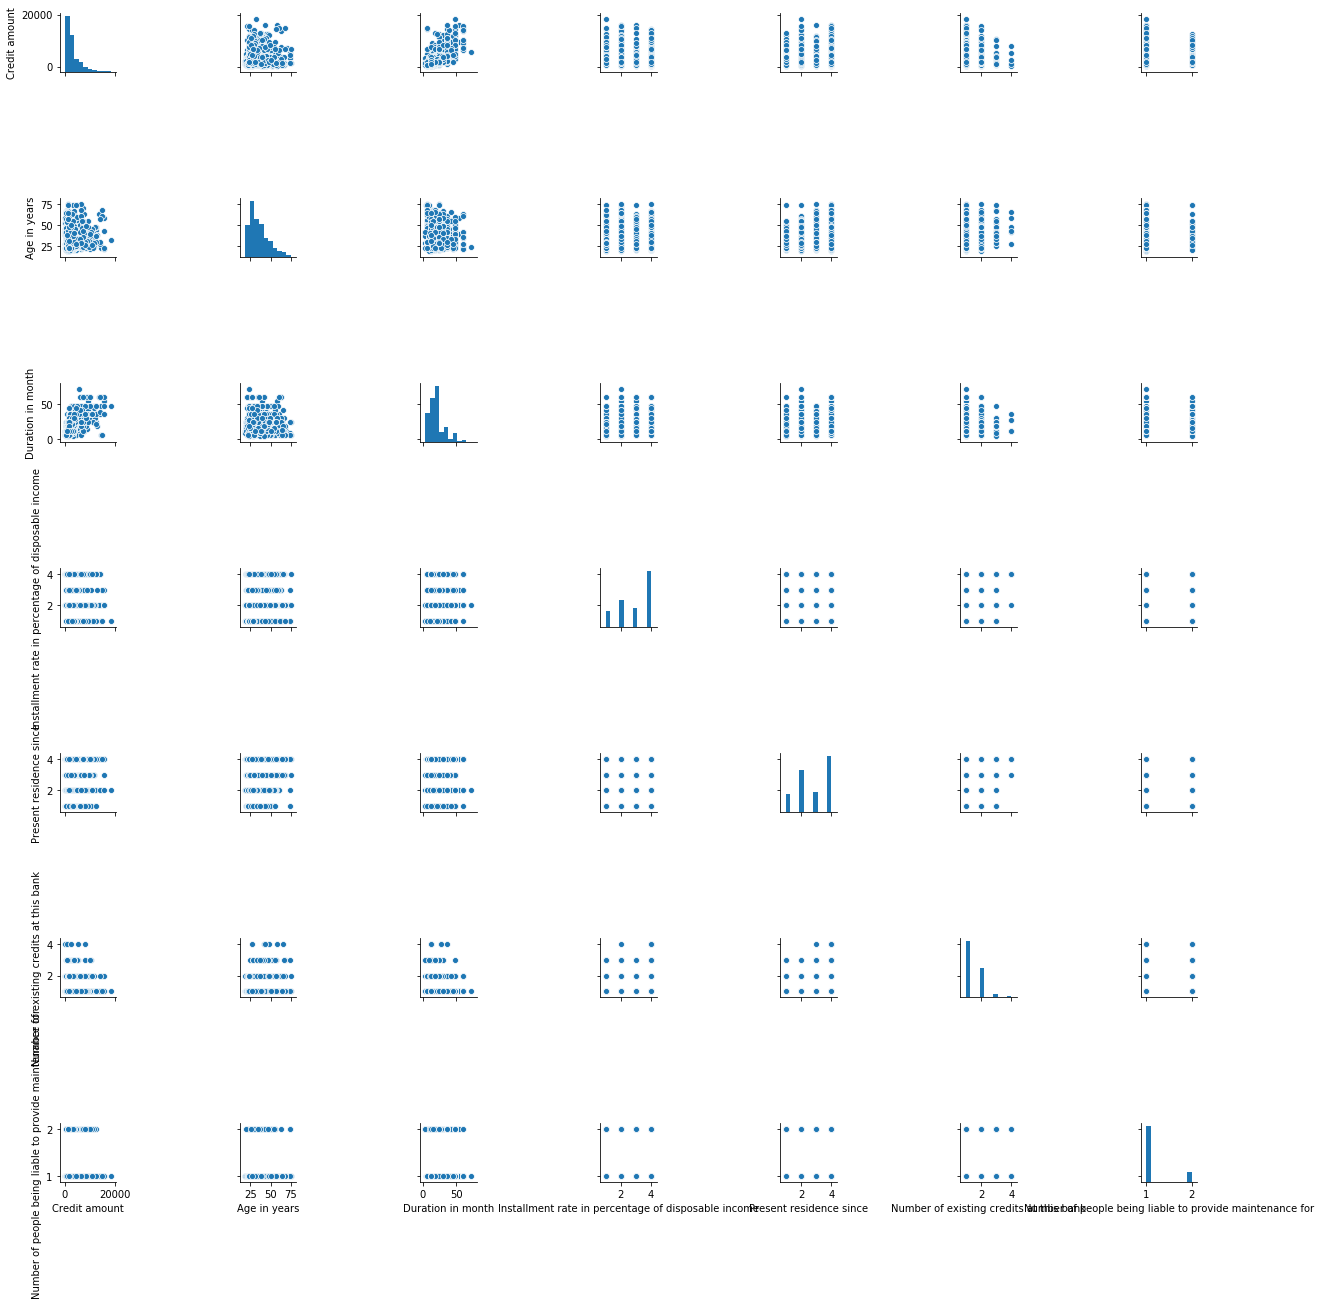

In [72]:
sns.pairplot(num_features)

Lets look at some EDA to understand more about our dataset, both categoricals and numerical variales

## <a name="eda">Exploratory Data Analysis (EDA)</a>

We are going to plot the graph between the predictor variables and the target variable

In [136]:
data = df.copy()

Firt we rename columns name for better representation 

In [254]:
data = df.rename(columns={"Status of existing checking account": 'Account Balance', 
                   "Duration in month": "Duration of Credit (month)",
                   "Credit history": "Payment Status of Previous Credit",
                  'Present employment since':'Length of current employment',
       'Installment rate in percentage of disposable income':'Instalment per cent',
       'Personal status and sex':'Sex & Marital Status',
        'Other debtors / guarantors': 'Guarantors',
       'Present residence since':'Duration in Current address', 
                   'Property' :'Most valuable available asset', 
                   'Age in years':'Age (years)',
       'Other installment plans':'Concurrent Credits',
                   'Housing':'Type of apartment',
       'Number of existing credits at this bank':'No of Credits at this Bank',
                   'Job':'Occupation',
       'Number of people being liable to provide maintenance for':'No of dependents',
       'foreign worker':'Foreign Worker', 
                   'Cost Matrix(Risk)':'Creditability', 'Credit amount': 'Credit Amount'})

# df1 = data.to_csv('german_credit_risk.csv', index=False)

#### Target Variable

We will first look at the target variable, Creditability

As it is a categorical variable, let us look at its frequency table and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [96]:
data["Creditability"].value_counts()

Good Risk    700
Bad Risk     300
Name: Creditability, dtype: int64

As we can see, 70% of our sample is Good Risk, 30% is Bad Risk

Good Risk    700
Bad Risk     300
Name: Creditability, dtype: int64


<Figure size 432x432 with 0 Axes>

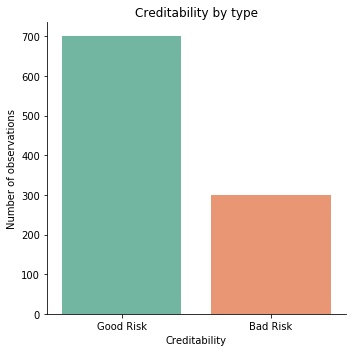

In [195]:
print(data['Creditability'].value_counts())
plt.figure(figsize=(6,6))
bar = sns.catplot(x="Creditability", kind="count", palette="Set2", data=data)
plt.ylabel("Number of observations")
plt.title('Creditability by type')
plt.tight_layout()

700 people out of 1000 loan applicants was approved.

Now lets visualize each variables (categorical and numerical) separately in relation to target variable

Categorical features: These features have categories (Sex & Marital Satus, Occupation, Type of apartment, Account Balance)

#### Exploratory Analysis of Categorical Variables

In [157]:
data["Sex & Marital Status"].value_counts()

male:single                          548
female:divorced/separated/married    310
male:married/widowed                  92
male:divorced/separated               50
Name: Sex & Marital Status, dtype: int64

Male applicants makes up the most of our dataset, around 70%

#### Relation between "Risk type" and Sex & Martial Status

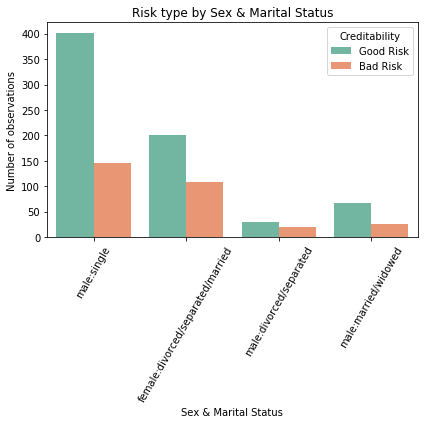

In [194]:
plt.figure(figsize=(6,6))
fig = sns.countplot(data=data,x='Sex & Marital Status',hue='Creditability',palette='Set2')
fig.set_xticklabels(fig.get_xticklabels(), rotation=60)
plt.ylabel("Number of observations")
plt.title('Risk type by Sex & Marital Status')
plt.tight_layout()

As we can see, Bad risk likely occurs the most in Male, especially Divorced/ Separated

In [112]:
# Sex and Marital Status vs Purpose- let's see the purpose of having credit loans for each gender.
data["Purpose"].unique()
sex_purpose = pd.crosstab(data['Purpose'], data['Sex & Marital Status']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex & Marital Status,female:divorced/separated/married,male:divorced/separated,male:married/widowed,male:single
Purpose,,,,
business,6.129032,20.0,9.782609,10.766423
car (new),22.580645,20.0,21.739130,24.452555
car (used),7.741935,6.0,6.521739,12.773723
domestic appliances,1.935484,2.0,1.086957,0.729927
education,6.774194,2.0,1.086957,4.927007
furniture/equipment,23.870968,30.0,7.608696,15.510949
others,0.967742,2.0,0.000000,1.459854
radio/television,27.419355,14.0,45.652174,26.642336
repairs,1.612903,4.0,3.260870,2.189781


The most common purposes for taking a loan from Divorced Male applicants is for urchasing cars and furniture/ equipment and doing business

####  Relation between "Risk type" and "Account Balance"

no checking account    394
<0 DM                  274
0 <= <200 DM           269
>= 200 DM               63
Name: Account Balance, dtype: int64


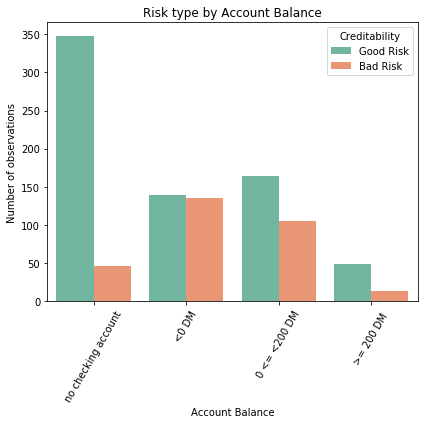

In [192]:
print(data["Account Balance"].value_counts())
plt.figure(figsize=(6,6))
fig = sns.countplot(data=data,x='Account Balance',hue='Creditability',palette='Set2',
                     order = data["Account Balance"].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=60)
plt.ylabel("Number of observations")
plt.title('Risk type by Account Balance')
plt.tight_layout()

As we can see, Bad risk likely occurs in lower Account Balance

####  Relation between "Risk type" and Payment Status of Previous Credit'

existing credits paid back duly till now    530
critical account                            293
delay in paying off                          88
all credits at this bank paid back duly      49
no credits taken                             40
Name: Payment Status of Previous Credit, dtype: int64


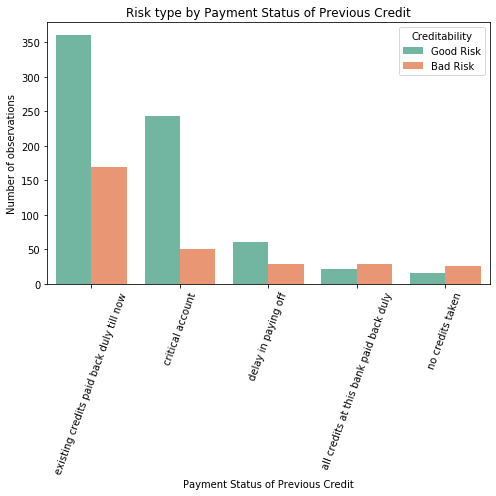

In [200]:
print(data["Payment Status of Previous Credit"].value_counts())
plt.figure(figsize=(7,7))
fig = sns.countplot(data=data,x='Payment Status of Previous Credit',hue='Creditability',palette='Set2',
                     order = data["Payment Status of Previous Credit"].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=70)
plt.ylabel("Number of observations")
plt.title('Risk type by Payment Status of Previous Credit')
plt.tight_layout()

Appicants who already paid back fully existing credits likely to incur Bad risk

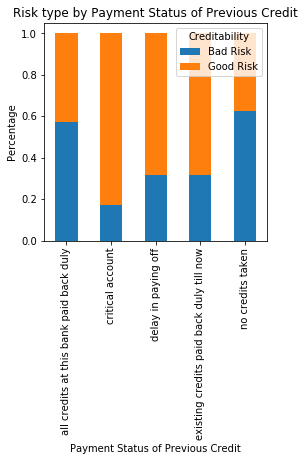

In [212]:
# print(pd.crosstab(data['Payment Status of Previous Credit'], data['Creditability']))
Gender = pd.crosstab(data['Payment Status of Previous Credit'], data['Creditability'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Payment Status of Previous Credit")
plt.ylabel("Percentage")
plt.title("Risk type by Payment Status of Previous Credit")
plt.show()

In term of percentage, as we can see, Bad risk likely occurs in applicants who took no credits or have paid back all credits until now

radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: Purpose, dtype: int64


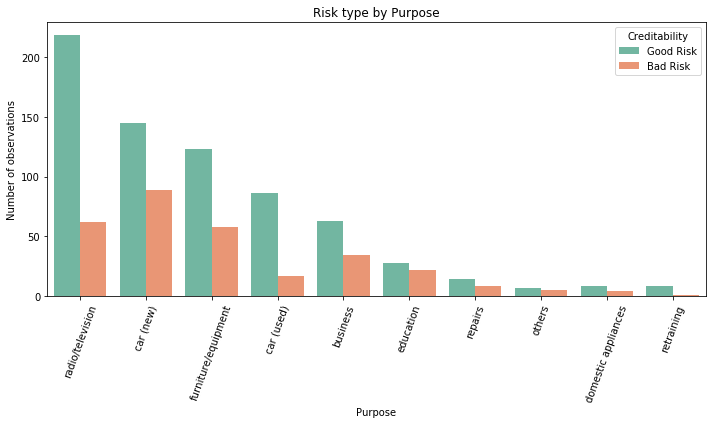

In [202]:
print(data["Purpose"].value_counts())
plt.figure(figsize=(10,6))
fig = sns.countplot(data=data,x='Purpose',hue='Creditability',palette='Set2',
                     order = data["Purpose"].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=70)
plt.ylabel("Number of observations")
plt.title('Risk type by Purpose')
plt.tight_layout()

Regarding numbers of observations, as we can see, Bad risk likely occurs when applicants take the loan for buying new cars, radio/ television an d furniture/ equipment

In term of percentage, as we can see, Bad risk likely occurs in applicants who use loans for education purposes

####  Relation between "Risk type" and Occupation

skilled employee / official              630
unskilled - resident                     200
management/ highly qualified employee    148
unemployed/ unskilled  - non-resident     22
Name: Occupation, dtype: int64


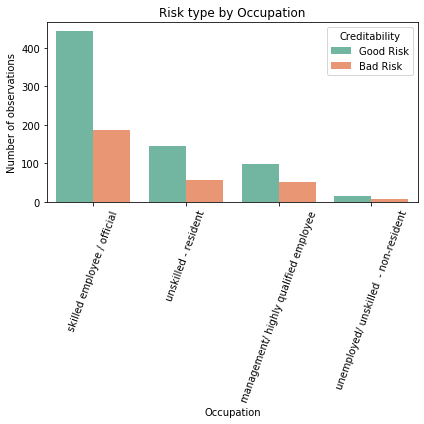

In [216]:
print(data["Occupation"].value_counts())
plt.figure(figsize=(6,6))
fig = sns.countplot(data=data,x='Occupation',hue='Creditability',palette='Set2',
                     order = data["Occupation"].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=70)
plt.ylabel("Number of observations")
plt.title('Risk type by Occupation')
plt.tight_layout()

As we can see, Bad risk likely occurs in Skilled employees

####  Relation between "Risk type" and Type of Apartment

own         713
rent        179
for free    108
Name: Type of apartment, dtype: int64


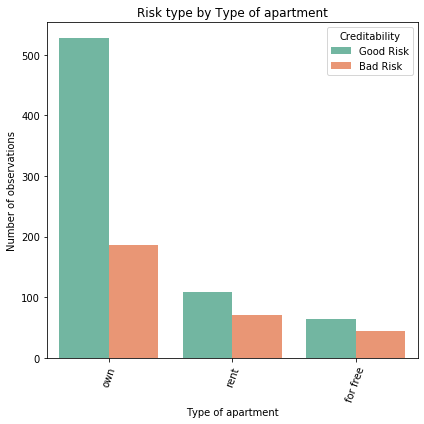

In [215]:
print(data["Type of apartment"].value_counts())
plt.figure(figsize=(6,6))
fig = sns.countplot(data=data,x='Type of apartment',hue='Creditability',palette='Set2',
                     order = data["Type of apartment"].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=70)
plt.ylabel("Number of observations")
plt.title('Risk type by Type of apartment')
plt.tight_layout()

As we can see, Bad risk likely occurs in applicants who rent or live for free

####  Relation between "Risk type" and Foreign Worker

yes    963
no      37
Name: Foreign Worker, dtype: int64


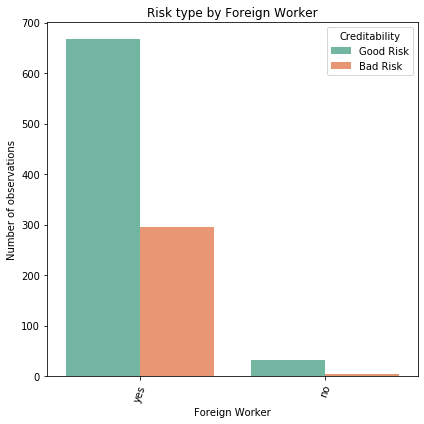

In [217]:
print(data["Foreign Worker"].value_counts())
plt.figure(figsize=(6,6))
fig = sns.countplot(data=data,x='Foreign Worker',hue='Creditability',palette='Set2',
                     order = data["Foreign Worker"].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=70)
plt.ylabel("Number of observations")
plt.title('Risk type by Foreign Worker')
plt.tight_layout()

As we can see, Bad risk likely occurs in applicants who are Foreign Worker

#### Exploratory Analysis of Numerical Variables

In [37]:
# Distribution of Credit Amount

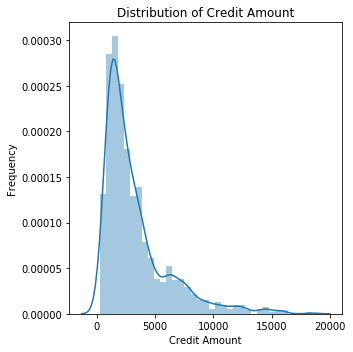

In [279]:
plt.figure(figsize=(5,5))
fig = sns.distplot(data['Credit Amount']).set_title('Distribution of Credit Amount')
plt.ylabel("Frequency")
plt.tight_layout()

#### Relation between "Risk type and Credit Amount

In [280]:
bins = [0, 1500, 3500, 20000]
group=['Low','Average','High']
data["Credit Amount_bin"]=pd.cut(data["Credit Amount"],bins,labels=group)

Creditability      Bad Risk  Good Risk
Credit Amount_bin                     
Low                      88        218
Average                  97        283
High                    115        199


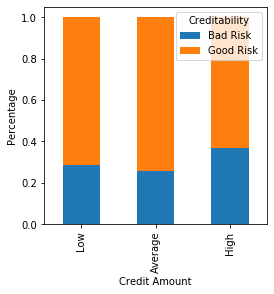

In [281]:
print(pd.crosstab(data["Credit Amount_bin"],data["Creditability"]))
CreditAmount= pd.crosstab(data["Credit Amount_bin"],data["Creditability"])
CreditAmount.div(CreditAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("Credit Amount")
plt.ylabel("Percentage")
plt.show()

Whose Loan Amount was low and Loan was approved : 218

Whose Loan Amount was low and Loan was not approved : 88

Whose Loan Amount was Average and Loan was approved : 283

Whose Loan Amount was Average and Loan was not approved : 97

Whose Loan Amount was High and Loan was approved : 199

Whose Loan Amount was High and Loan was not approved : 115

It can be seen that the proportion of approved loans is higher for Low and Average Credit Amount as compared to that of High Credit Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [37]:
# Distribution of Credit Duration

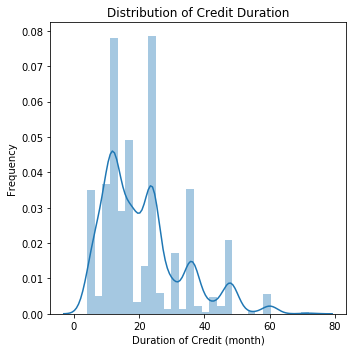

In [256]:
plt.figure(figsize=(5,5))
fig = sns.distplot(data['Duration of Credit (month)']).set_title('Distribution of Credit Duration')
plt.ylabel("Frequency")
plt.tight_layout()

In [258]:
data['Duration of Credit (month)'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration of Credit (month), dtype: float64

#### Relation between "Risk type and Credit Duration

In [259]:
bins = [0, 12, 24, 72]
group=['Low','Average','High']
data["Credit Duration_bin"]=pd.cut(data['Duration of Credit (month)'],bins,labels=group)

Creditability        Bad Risk  Good Risk
Credit Duration_bin                     
Low                        76        283
Average                   122        289
High                      102        128


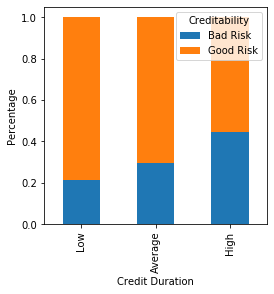

In [260]:
print(pd.crosstab(data["Credit Duration_bin"],data["Creditability"]))
CreditDur= pd.crosstab(data["Credit Duration_bin"],data["Creditability"])
CreditDur.div(CreditDur.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("Credit Duration")
plt.ylabel("Percentage")
plt.show()

It can be seen that the proportion of approved loans is higher for Low and Average Credit Duration as compared to that of High Credit Duration which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan Durstion is less.

In [37]:
# Distribution of Age

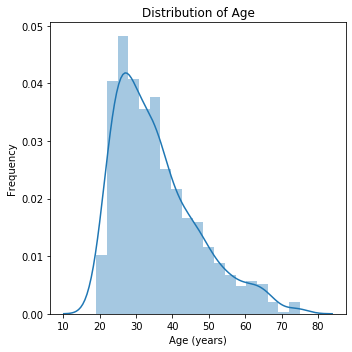

In [261]:
plt.figure(figsize=(5,5))
fig = sns.distplot(data['Age (years)']).set_title('Distribution of Age')
plt.ylabel("Frequency")
plt.tight_layout()

In [262]:
data['Age (years)'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age (years), dtype: float64

#### Relation between "Risk type and Credit Duration

In [273]:
bins = [0, 20, 40, 75]
group=['Young','Middle-aged','Senior']
data["Age_bin"]=pd.cut(data['Age (years)'],bins,labels=group)

Creditability  Bad Risk  Good Risk
Age_bin                           
Young                 6         10
Middle-aged         222        488
Senior               72        202


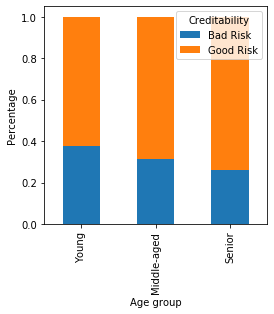

In [275]:
print(pd.crosstab(data["Age_bin"], data["Creditability"]))
age= pd.crosstab(data["Age_bin"],data["Creditability"])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Age group')
plt.ylabel("Percentage")
plt.show()

It can be seen that the proportion of approved loans is higher for Middle ages and Senior groups compared to that of in young adults which supports our hypothesis in which we considered that the chances of loan approval will be high when the Age is higher

In [276]:
# Let’s drop the bins which we created for the exploration part

In [282]:
data=data.drop(["Credit Amount_bin","Credit Duration_bin","Age_bin"],axis=1)

### Map categorical variables into numeric variables 

Since the categorical has Ordinal ranking so we cannot use Label Encode to transfiorm into numeric. 

Instead, we will map each class individually. 

This step is performed in Excel for ease of hanling input errors using Pivot Table, Advance Filter and Vlookup


1.Creditability
Categorical
(Nominal)
1- Credit worthy
0- Not Credit Worthy

2.Account Status
Categorical
(Nominal)
1- no running account
2-no balance or debit
3-0 <= ... < 200 DM
4-... >= 200 DM or checking account for at least 1 year

3.Duration of credit (month)
Numerical
 6
12
24
Tells about duration of credit in months

4.Payment status of previous credit
(Nominal)
0-hesitant payment of previous credits
1-problematic running account / there are further credits running but at other banks
2-no previous credits / paid back all previous credits
3-no problems with current credits at this bank
4-paid back previous credits at this bank

5.Purpose of credit
(Nominal)
1-new car
2-used car
3-items of furniture
4-radio/television
5-household appliance
6-repair
7-education
8-vacation
9-retraining
10-business
0-other

6.Credit amount
(Nominal)
1- > 20000
2- 15000 < ... <= 20000
3- 10000 < ... <= 15000
4- 7500 < ... <= 10000
5- 5000 < ... <= 7500
6- 2500 < ... <= 5000
7-1500 < ... <= 2500
8- 1000 < ... <= 1500
9- 500 < ... <= 1000
10- <=500

7.Value of savings/stock
(Nominal)
1- <50
2- < 100,- DM
3- 100,- <= ... < 500,- DM
4- 500,- <= ... < 1000,- DM
5- >= 1000,- DM

8.Length of current employment
Categorical
(Nominal)
1- 0
2- <= 1 year
3- 1 <= ... < 4 years
4 -4 <= ... < 7 years
5 ->= 7 years

9.Installment %
Categorical
(Nominal)
1- >= 35
2- 25 <= ... < 35
3- 20 <= ... < 25
4- < 20

10.Sex and marital status
Categorical
(Nominal)
1- male: divorced / living apart
2- male: single
3- male: married / widowed
4- female

11.Guarantor
Categorical
(Nominal)
1- None
2- Co-applicant
3- Guarantor

12.Duration of current address
Categorical
(Nominal)
1- 0 years
2- 1 <= ... < 4 years
3- 4 <= ... < 7 years
4- >= 7 years

13.Most valuable available status
Categorical
(Nominal)
1- not available / no assets
2- Car / Other
3- Savings contract with a building society / Life insurance
4- Ownership of house or land

14.Age
Numerical


15.Concurrent credits
Categorical
(Nominal)
1- at other banks
2- at department store or mail order house
3- no further running credits

16.Type of Apartment
Categorical
(Nominal)
1- free apartment
2- rented
3- owner

17.No of credits at bank
Categorical
(Nominal)
1- one
2- two or three
3- four or five
4- six or more

18.Occupation
Categorical
(Nominal)
1- unemployed
2- unskilled with PR
3- skilled worker
4- executive/self-employed

19.No of Dependents
Categorical
(Nominal)
1- zero to two
2-  three or more

20.Telephone
Categorical
(Nominal)
1- no
2- yes

21.Foreign Worker
Categorical
(Nominal)
1- yes
2- no

### Import Mapped Data

In [3]:
data = pd.read_csv('german_data.csv')

### Print the data types

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [30]:
# for col in data:
#     print(data[col].value_counts())

We can see categorical variables are converted into numeric values

# Section 3. Data Preparation

# Missing Value and Outlier Treatment

After exploring variables in our data, we can now check the missing values and treat the outliers 

because missing data and outliers can have negative effect on the model performance.

## Null values and duplicates

In [294]:
# Checking for null values
N_null = sum(data.isnull().sum())

# Checking duplicates
N_dupli = sum(data.duplicated())

N_na= sum(data.isna().sum())

print("The raw_dataset contains {} null values".format(N_null)) #0 null values
print("The raw_dataset contains {} duplicates".format(N_dupli))
print("The raw_dataset contains {} na values".format(N_na))

The raw_dataset contains 0 null values
The raw_dataset contains 0 duplicates
The raw_dataset contains 0 na values


## Outlier Treatment

To understand better about data shape, we will perform visualization

### Distribution of "Age" variable :

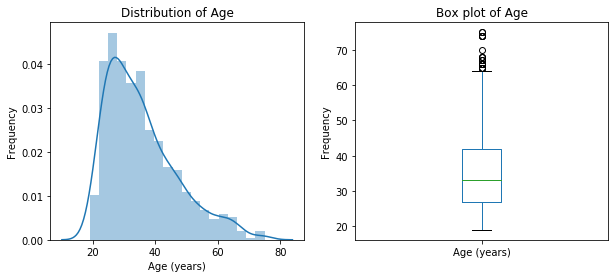

In [13]:
plt.figure(1)
plt.subplot(121)
ax1=sns.distplot(data["Age (years)"]).set_title('Distribution of Age')
plt.ylabel('Frequency')
plt.subplot(122)
data["Age (years)"].plot.box(figsize=(10,4)).set_title('Box plot of Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Age.png')

The distribution plot shows that customers according to their age is highest among customers from age group (25-35)

We also see some of outliers in the Age variable and it is not normally distributed. We will treat the outliers

### Let’s look at the distribution of "Credit Amount" variable :

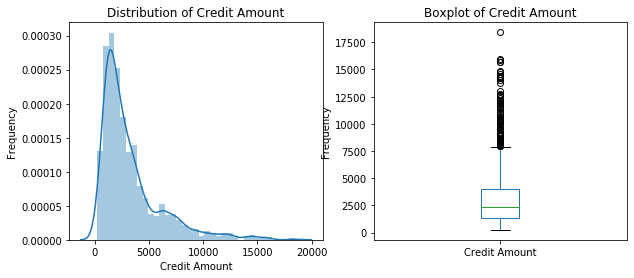

In [14]:
plt.figure(1)
plt.subplot(121)
fig = sns.distplot(data['Credit Amount']).set_title('Distribution of Credit Amount')
plt.ylabel('Frequency')
plt.subplot(122)
data['Credit Amount'].plot.box(figsize=(10,4)).set_title('Boxplot of Credit Amount')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Credit Amt.png')

It can be inferred that most of the data in the distribution of Credit Amount is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. 

Part of this can be that we are looking at people with different occupation levels. Let us separate them by Occupation:

We can see that most of the outliers lie in the unskilled with permanent residence and skilled employee

### Distribution of "Duration of Credit" variable :

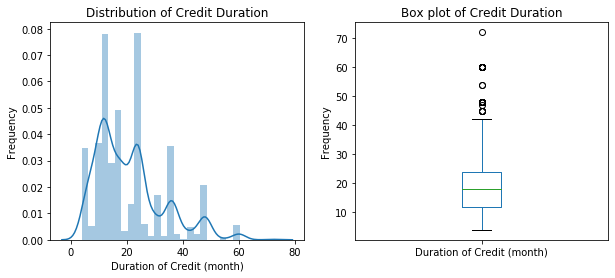

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["Duration of Credit (month)"]).set_title('Distribution of Credit Duration')
plt.ylabel('Frequency')
plt.subplot(122)
data["Duration of Credit (month)"].plot.box(figsize=(10,4)).set_title('Box plot of Credit Duration')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Duration.png')

We see a similar distribution as that of the Credit Amount. Most of the Credit duration ranges from 11 to 42 months. 

We would expect scaling the distributions to the same range to be useful for modelling, and perhaps the use of some log transforms to remove positive skewness

We also see some of outliers in the Credit duration and it is not normally distributed. We will treat the outliers in later sections.

Due to these outliers in the Credit amount, Age, Duration of Credit is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. 

### Log Tranformation

In [19]:
data['Credit Amount'].replace(0,1,inplace=True) 

In [20]:
import numpy as np
data['Age (years)']= np.log(data['Age (years)'])
data['Duration of Credit (month)']= np.log(data['Duration of Credit (month)'])
data['Credit Amount']= np.log(data['Credit Amount'])

<Figure size 432x288 with 0 Axes>

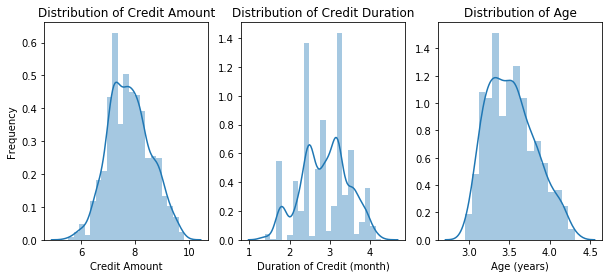

In [25]:
plt.figure(1)
plt.figure(figsize=(10,4))
plt.subplot(131)
sns.distplot(data['Credit Amount']).set_title('Distribution of Credit Amount')
plt.ylabel('Frequency')
plt.subplot(132)
sns.distplot(data["Duration of Credit (month)"]).set_title('Distribution of Credit Duration')
# plt.ylabel('Frequency')
plt.subplot(133)
sns.distplot(data["Age (years)"]).set_title('Distribution of Age')
# plt.ylabel('Frequency')
plt.show()

<Figure size 432x288 with 0 Axes>

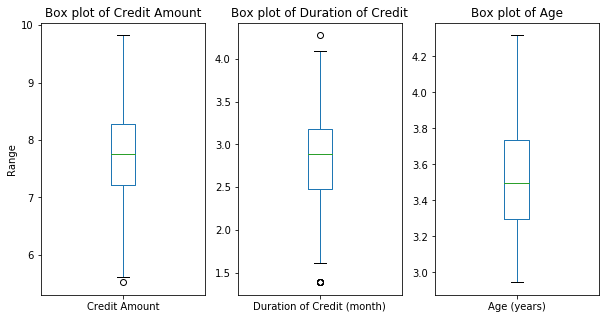

In [24]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(131)
data['Credit Amount'].plot.box(title='Box plot of Credit Amount')
plt.ylabel('Range')
plt.subplot(132)
data["Duration of Credit (month)"].plot.box(title='Box plot of Duration of Credit')
# plt.ylabel('Range')
plt.subplot(133)
data["Age (years)"].plot.box(title='Box plot of Age')
# plt.ylabel('Range')
plt.show()

As we can see from above plot, after log transformation the outliers are gone for Age. 

So we continue to remove outliers from Credit Amount and Duration of Credit. This time the distribution of slightly negative skewed

#### Assuming outliers are due to measurement errors, suggested approach is to replace outliers with median

First we impute the threshold for outliers and print it out to check reasonableness

In [26]:
q75, q25, q50 = np.percentile(data['Credit Amount'], [75 ,25, 50])
iqr = q75 - q25
threshold = q25-1.5*iqr

In [27]:
print('Skewness :',data['Credit Amount'].skew())
print('Threshold: ', threshold)
outlier = data[data['Credit Amount'] < threshold]
print('Shape of outlier ',outlier.shape)
outlier.head()

Skewness : 0.1291343680786358
Threshold:  5.617557412506091
Shape of outlier  (1, 21)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
312,1,4,1.791759,4,0,5.521461,4,3,2,2,...,2,1,3.713572,1,2,2,2,1,1,1


In [28]:
df = data.copy()

So we will fill NA value for 5 records from outliers of Credit Amount and impute them with median

In [29]:
df['Credit Amount'].replace(df['Credit Amount'][df["Credit Amount"] < threshold], np.nan, inplace = True)
df['Credit Amount'].fillna(df['Credit Amount'].median(), inplace=True)
# df['Credit Amount'].skew()

We did similarly with Duration of Credit 

In [30]:
q75, q25, q50 = np.percentile(df['Duration of Credit (month)'], [75 ,25, 50])
iqr = q75 - q25
threshold = q25-1.5*iqr

In [31]:
print('Skewness :',df['Duration of Credit (month)'].skew())
print('Threshold: ', threshold)
outlier = df[df['Duration of Credit (month)'] < threshold]
print('Shape of outlier ',outlier.shape)
outlier.head()

Skewness : -0.12741444789193515
Threshold:  1.4451858789480823
Shape of outlier  (6, 21)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
210,1,3,1.386294,2,0,7.309212,5,2,1,3,...,2,1,3.367296,3,2,1,2,2,1,2
238,1,4,1.386294,2,2,6.398595,1,2,1,2,...,3,1,3.135494,3,1,1,2,2,1,1
530,1,4,1.386294,4,3,7.315218,1,4,2,3,...,1,1,3.737670,3,2,2,2,2,1,1
536,1,4,1.386294,4,0,8.125631,1,4,1,2,...,1,1,3.610918,3,2,1,3,2,1,1
537,1,4,1.386294,4,0,7.282761,1,4,2,3,...,1,1,3.737670,3,2,3,2,2,1,1


In [32]:
df['Duration of Credit (month)'].replace(df['Duration of Credit (month)'][df['Duration of Credit (month)'] < threshold], np.nan, inplace = True)
df['Duration of Credit (month)'].fillna(df['Duration of Credit (month)'].median(), inplace=True)
# df['Duration of Credit (month)'].skew()

Let's have a look at the distribution of above variables after outlier treatment

Now the distribution looks much closer to normal and effect of extreme values has been significantly reduced

<Figure size 432x288 with 0 Axes>

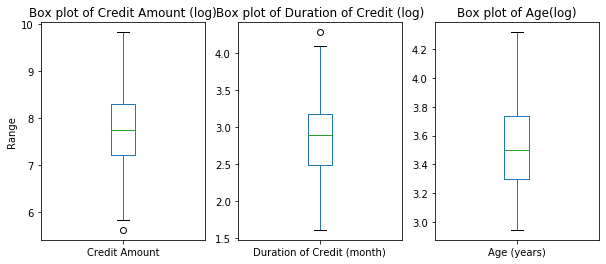

In [33]:
plt.figure(1)
plt.figure(figsize=(10,4))
plt.subplot(131)
df['Credit Amount'].plot.box(title='Box plot of Credit Amount (log)')
plt.ylabel('Range')
plt.subplot(132)
df["Duration of Credit (month)"].plot.box(title='Box plot of Duration of Credit (log)')
plt.subplot(133)
df["Age (years)"].plot.box(title='Box plot of Age(log)')
plt.show()
plt.savefig('Boxplot.png')

## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. 

We will create EMI

EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of Credit amount and Duration of Credit

In [34]:
df['EMI']= df['Credit Amount']/ df['Duration of Credit (month)']    
print(df['EMI'].describe())

count    1000.000000
mean        2.783667
std         0.509176
min         1.901021
25%         2.429789
50%         2.650257
75%         3.019559
max         5.362800
Name: EMI, dtype: float64


We draw a boxplot of EMI to visualize its distribution

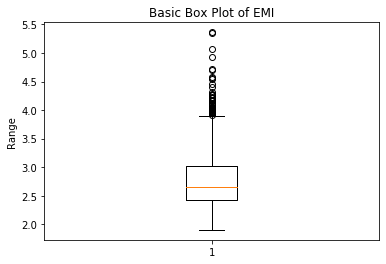

In [35]:
fig, ax = plt.subplots()
ax.set_title('Basic Box Plot of EMI')
ax.boxplot(df['EMI'])
plt.ylabel('Range')
plt.show()

Since the EMI distribution is right skewed, we find the threshold and print the outliers for consideration about shape and reasonableness

In [36]:
q75, q25, q50 = np.percentile(df['EMI'], [75 ,25, 50])
iqr = q75 - q25
threshold = q75+1.5*iqr

In [37]:
print('Skewness :',df['EMI'].skew())
print('Threshold: ', threshold)
outlier = df[df['EMI'] > threshold]
print('Shape of outlier ',outlier.shape)
outlier.head()

Skewness : 1.441321910398424
Threshold:  3.9042126985075356
Shape of outlier  (51, 22)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,EMI
6,1,1,2.079442,4,0,8.130942,1,4,1,3,...,1,3.663562,3,2,2,2,1,1,2,3.910157
7,1,1,1.791759,4,0,7.215975,1,2,2,3,...,1,3.688879,3,2,1,2,2,1,2,4.027312
12,1,1,1.791759,4,3,7.579168,1,4,1,2,...,3,3.433987,3,2,1,3,1,1,1,4.230014
15,1,1,1.791759,2,3,7.881182,3,3,2,3,...,1,3.784190,3,1,1,3,2,1,1,4.398572
20,1,1,1.791759,4,0,8.209580,1,3,1,3,...,1,3.610918,3,1,3,3,2,1,1,4.581854


We fill outliers with NA and impute with median

In [38]:
df['EMI'].replace(df['EMI'][df['EMI'] > threshold], np.nan, inplace = True)
df['EMI'].fillna(df['EMI'].median(), inplace=True)
# df['EMI'].skew()

Let’s check the distribution of EMI after handling outliers

In [39]:
# fig, ax = plt.subplots()
# ax.set_title('Basic Box Plot of EMI after outlier treatment')
# ax.boxplot(df['EMI'])
# plt.show()

Let us check the correlation between variables to identify any multicollieraity

Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 

We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [40]:
df[['EMI', 'Age (years)', 'Credit Amount', 'Duration of Credit (month)']].corr()

,EMI,Age (years),Credit Amount,Duration of Credit (month)
EMI,1.000000,0.039797,-0.165435,-0.720101
Age (years),0.039797,1.000000,0.025237,-0.049077
Credit Amount,-0.165435,0.025237,1.000000,0.622057
Duration of Credit (month),-0.720101,-0.049077,0.622057,1.000000


We check and see that there is no multicollineariy or significant correlation between these variables. 

# Feature selection

Feature selection is the proceess that you manually or automatically selecct features which contributes most to prediction variables or outcome instead of irrelvant features which can decrease the model's performance, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

 Reduces Overtting

 Improves Accuracy

 Reduces Training Time (Less data) 

Here we will perform feature selection based on Heatmap and Feature importance for comparison

### Drop irrelevant features

We also drop irrelavant features such as Foreign Worker and Telephone

In [41]:
df1 = df.copy()

In [42]:
df1.drop('Foreign Worker', axis=1, inplace=True)
df1.drop('Telephone', axis=1, inplace=True) 

### Correlation matrix with Heatmap

Correlation states how the features relate to each other and with target variables

Correlation can be positive (increase in one value of feauture increase  the value of target variable) or negative (increase in one value of feauture decrease the value of target variable)

We will plot heatmap using seaborn library to identify which features are most related to target variable

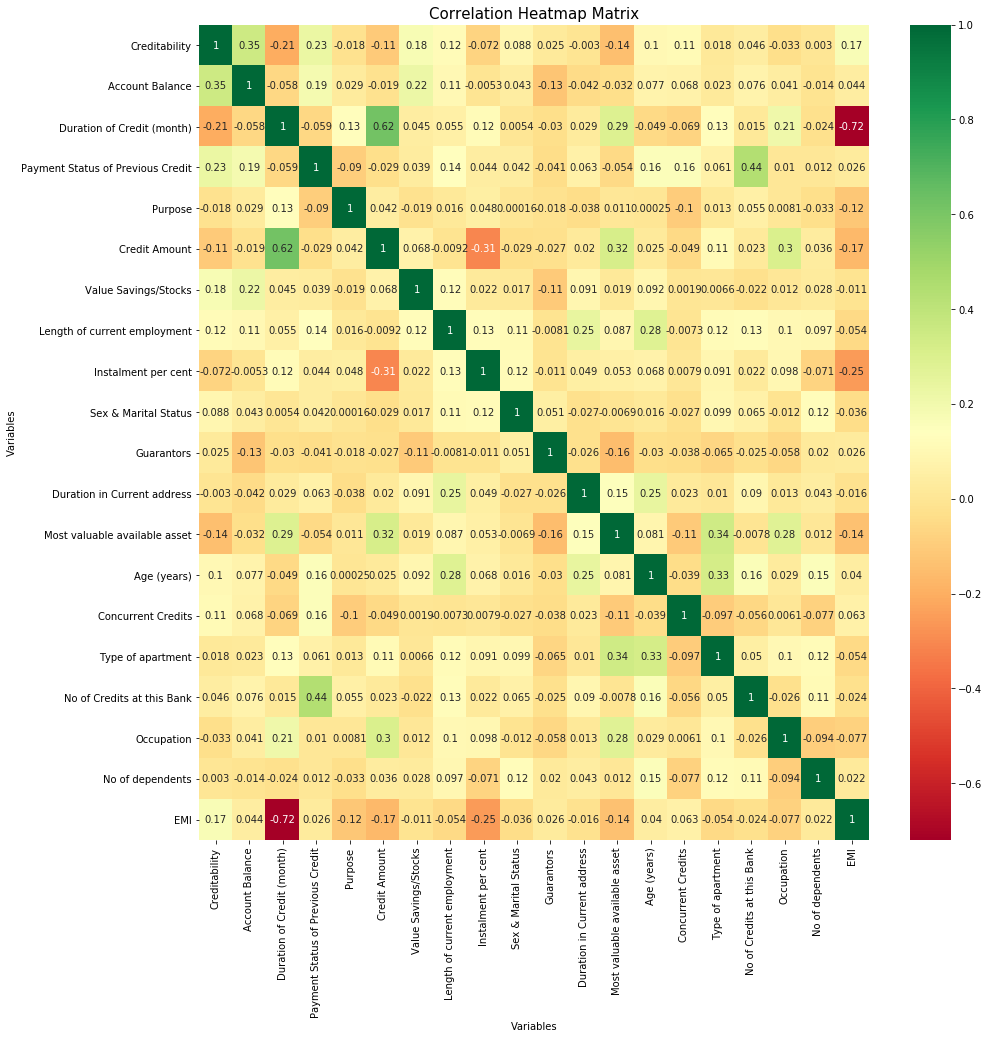

In [45]:
#Correlation Matrix by Heatmap
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title('Correlation Heatmap Matrix', fontsize=15)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()
plt.savefig('heatmap.png')

The higher the correlation, the more stronger relationship.

As we can see, most relevant features to Creditability is Account Balance (0.35), Payment status of Previous Credit (0.23), EMI (0.17), Value Savings/ Stocks (0.18)

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   int64  
 1   Account Balance                    1000 non-null   int64  
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   int64  
 4   Purpose                            1000 non-null   int64  
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   int64  
 7   Length of current employment       1000 non-null   int64  
 8   Instalment per cent                1000 non-null   int64  
 9   Sex & Marital Status               1000 non-null   int64  
 10  Guarantors                         1000 non-null   int64  
 11  Duration in Current address        1000 non-null   int64 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [50]:
X = df1.iloc[:,1:20] # predictor columns
y = df1.iloc[:,0] #target column

### Feature Importance

Extra Tree ( a technique of decision tree) can be used to estimate the importance of features.

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

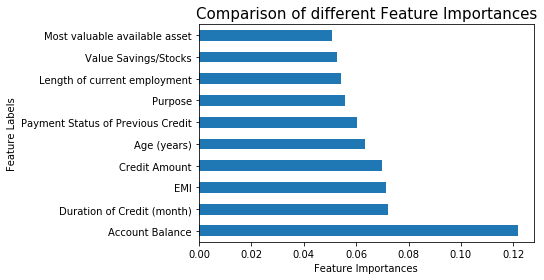

In [53]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importances') 
plt.ylabel('Feature Labels') 
plt.title('Comparison of different Feature Importances', fontsize=15) 
plt.show() 
plt.savefig('features_imp.png')

I decide to choose features seleded from Feature importance method since this makes more sense based on domain expert

You can see that we are given an importance score for each attribute where the larger the score, the more important the attribute.

Therefore, 6 selected features will be: Account Balance', 'Payment Status of Previous Credit', 'Age (years)', 
'Credit Amount','Duration of Credit (month)', 'EMI','

# Section 4. Modelling

In this section we will build Logistic Model using sklearn and statsmodel, Linear Regression model using sklearn and statsmodel, and Regression Tree using sklearn, 

#### Import the required library

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

#### Create new Dataframe  with selectec features and target variable

In [55]:
col = ['Account Balance', 'Payment Status of Previous Credit', 'Age (years)', 
       'Credit Amount','Duration of Credit (month)', 'EMI','Creditability']

finaldf = pd.DataFrame(df1, columns = col)
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account Balance                    1000 non-null   int64  
 1   Payment Status of Previous Credit  1000 non-null   int64  
 2   Age (years)                        1000 non-null   float64
 3   Credit Amount                      1000 non-null   float64
 4   Duration of Credit (month)         1000 non-null   float64
 5   EMI                                1000 non-null   float64
 6   Creditability                      1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [56]:
finaldf.head()

,Account Balance,Payment Status of Previous Credit,Age (years),Credit Amount,Duration of Credit (month),EMI,Creditability
0,1,4,3.044522,6.955593,2.890372,2.406470,1
1,1,4,3.583519,7.937017,2.197225,3.612292,1
2,2,2,3.135494,6.734592,2.484907,2.710199,1
3,1,4,3.663562,7.660114,2.484907,3.082657,1
4,1,4,3.637586,7.682943,2.484907,3.091844,1


#### Divide the dataset into two parts: train & test

The simplest method that we can use to evaluate the performance of a machine learning
algorithm is to use different training and testing datasets. We can take our original dataset and
split it into two parts. Train the algorithm on the first part, make predictions on the second
part and evaluate the predictions against the expected results. The size of the split can depend
on the size of your dataset.

In [57]:
X = finaldf[['Account Balance', 'Payment Status of Previous Credit', 'Age (years)', 
       'Credit Amount', 'Duration of Credit (month)', 'EMI']]
y = finaldf['Creditability']
display(X.shape, y.shape)

(1000, 6)

(1000,)

In [143]:
# finaldf.to_csv('final_data.csv',header=True, index=False)



We will use the train_test_split from sklearn to divide our train dataset. 

The dataset has been divided into training and test part.

Note that in addition to specifying the size of the split, we also specify the random seed (here I set at 0). 
Because we want to ensure that the results are redo-able and in turn the same split of data. 
This is important if we want to compare this result to other models's accuracy,
in which Classification accuracy is the number of correct predictions made as a ratio of all predictions
made.

In [2]:
### SUMMARY

In [58]:
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)
    model.fit(X_train, y_train)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    print('Accuracy on testing :', model.score(X_test, y_test)*100)

In [59]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1, X, y)

(900, 6) (900,) (100, 6) (100,)
Accuracy on testing : 84.0


In [60]:
print(model1.coef_, model1.intercept_)

[[ 0.59005986  0.32341728  0.30525767 -0.02534911 -0.59906449  0.39455786]] [-1.52568468]


In [61]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
classify(model2, X, y)

(900, 6) (900,) (100, 6) (100,)
Accuracy on testing : 31.39827089297689


In [62]:
print(model2.coef_, model2.intercept_)

[ 0.10781956  0.05870173  0.05320533 -0.00391595 -0.11179402  0.07230892] 0.24134531737246134


In [3]:
#### IN DETAILS

### a. Logistic regression using Sklearn

Assumptions for Logistic Regression

○ No outliers in the data. An outlier can be identified by analyzing the independent variables

○ No correlation between the independent variables.
 

Logistic regression analysis can be used when the independent variable only has two categories: default and not default. 

The logistic model assumes the probability that a client will not default divided by the probability that he or she will default. 

Let's import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [80]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [79]:
logistic_model = LogisticRegression()
# model1 = LogisticRegression(fit_intercept = False, C = 1e9)

In [271]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
print(logistic_model.coef_, logistic_model.intercept_)

[[ 0.59005986  0.32341728  0.30525767 -0.02534911 -0.59906449  0.39455786]] [-1.52568468]


Let’s predict the Creditability on test set

In [275]:
y_pred=logistic_model.predict(X_test)

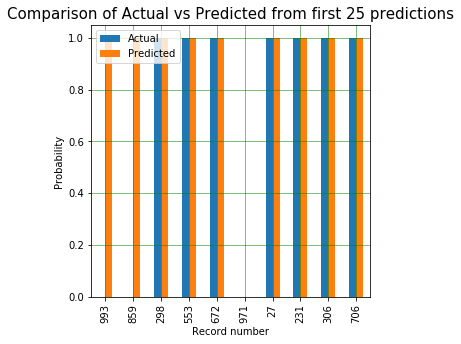

In [280]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_viz = df.head(10)

df_viz.plot(kind='bar',figsize=(5,5)). set_title('Comparison of Actual vs Predicted from first 25 predictions', size =15)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Record number')
plt.ylabel('Probability')
plt.show()
plt.savefig('chart2.png')

### b. Logistic regression from statsmodel

In [80]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, X_train)
log_model=logit.fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.520337
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  900
Model:                          Logit   Df Residuals:                      894
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.1495
Time:                        10:10:31   Log-Likelihood:                -468.30
converged:                       True   LL-Null:                       -550.62
Covariance Type:            nonrobust   LLR p-value:                 1.016e-33
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Account Balance                       0.5906      0.069      8

### c. Linear Regression using sklearn

In [82]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#Extract slope and intercept
print(linear_regression.intercept_)
print(linear_regression.coef_)

0.24134531737246134
[ 0.10781956  0.05870173  0.05320533 -0.00391595 -0.11179402  0.07230892]


In [286]:
y_pred = linear_regression.predict(X_test)

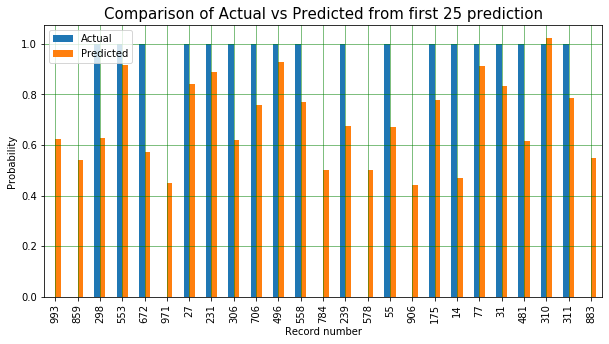

In [288]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_viz2 = df.head(25)

df_viz2.plot(kind='bar',figsize=(10,5)).set_title('Comparison of Actual vs Predicted from first 25 prediction', size =15)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Record number')
plt.ylabel('Probability')
plt.show()
plt.savefig('chart1.png')

#### d. Linear regression using statsmodel

In [84]:
### STATSMODELS ###
import statsmodels.formula.api as smf

In [85]:
# create a fitted model
lm1 = smf.ols( 'Creditability ~ Q("Account Balance") + Q("Duration of Credit (month)") + Q("EMI") + Q("Payment Status of Previous Credit") + Q("Age (years)") + Q("Credit Amount")', 
              data = finaldf).fit()
# print the coefficients
print(lm1.params)

Intercept                                 0.178749
Q("Account Balance")                      0.112070
Q("Duration of Credit (month)")          -0.116497
Q("EMI")                                  0.058019
Q("Payment Status of Previous Credit")    0.064582
Q("Age (years)")                          0.071693
Q("Credit Amount")                       -0.000661
dtype: float64


### e. Regression Trees

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
regression_tree = DecisionTreeRegressor(criterion='mse')

In [88]:
regression_tree = regression_tree.fit(X_train, y_train)

In [294]:
y_pred = regression_tree.predict(X_test)

# Section 5. Evaluation

### 1. Logistic Regression using sklearn

We will predict class labels of whether a customer is good or not. A number of performance metrics could be used to report the performance of the credit scoring classifiers including predictive accuracy, confusion matrix


The coefficient of logistic model using sklearn

In [562]:
print(logistic_model.coef_, logistic_model.intercept_)

[[ 0.59005986  0.32341728  0.30525767 -0.02534911 -0.59906449  0.39455786]] [-1.52568468]


### Create coeffecient matrix

The confusion matrix is a way to display of the accuracy of a model with two 
classes. 

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. 

The cells of the table are the number of predictions

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have
been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and
actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0
and actual = 1. And so on.

PCC (Overall Accuracy) = (True Positrive + True Negatives)/(True Positrive + True Negatives + False Positive + False Negative)

Confusion matrix is one of the methods that provides more information than the accuracy metric to evaluate model.

There are two metrics that need to pay attention:


False Positive: Good Customer (class 1) predicted as a Bad Customer (class 0).

False Negative: Bad Customer (class 0) predicted as a Good Customer (class 1).

Note that False Negatives are more costly to the bank than false positives.


○ Positive predictive value: the ratio of the number of true positives to the sum of the numbers of true and false positives.

○ Negative predictive value: the ratio of the number of true negatives to the sum of the numbers of true and false negatives.

○ Sensitivity (or recall or true positive rate): the ratio of the number of true positives to the number of actual positives.

○ Specificity (or true negative rate): the ratio of the number of true negatives to the number of actual negatives.

Type 1 error rate = False Positive/(True Negative + False Positive) - incorrectly reject null hypothesis

Type 2 error rate = False Negative/ (False Positive + False Negative)  - fail to reject a false null hypothesis

The focus of the task is on the positive class (bad customers). Precision and recall are a good place to start. Maximizing precision will minimize the false positives and maximizing recall will minimize the false negatives in the predictions made by a model. We can obtain this via classification report

Precision (Specificity/ TN rate) = True Negatives / (True Positives + False Positives)

Recall (Sensitivity/ TP rate) = True Positives / (True Positives + False Negatives)



In [568]:
y_pred=logistic_model.predict(X_test)

In [569]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18, 11],
       [ 5, 66]])

Text(0.5, 1, 'Confusion matrix')

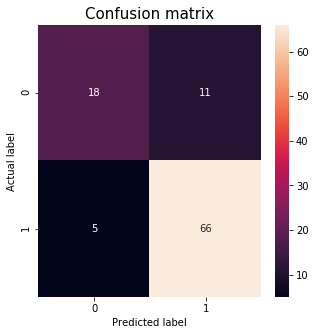

In [586]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(5,5))
sn.heatmap(cnf_matrix, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size =15)
plt.savefig('confusion_matrix.png')

In [571]:
accuracyScore = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ',accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.84
Accuracy In Percentage :  84 %


In [572]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.86      0.93      0.89        71

    accuracy                           0.84       100
   macro avg       0.82      0.78      0.79       100
weighted avg       0.84      0.84      0.83       100



We can see that overall the performance's accuracy is good. 

So our predictions are almost 84% accurate, i.e. we have identified 84% of the loan status correctly for our logistic regression model.

Also, the model performs okay to identify bad customers based on Precision and Recall rate of Class Uncreditability since these rate are all above 50% which means my model has a good ability to generalization

### 2. Logistic regression from statsmodel

##### Coefficient, Intercepts, Standard error, and the other model evaluation metrics

In [89]:
print(log_model.summary())
print('R-square  (%) is:',log_model.prsquared*100)

                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  900
Model:                          Logit   Df Residuals:                      894
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 Nov 2020   Pseudo R-squ.:                  0.1495
Time:                        13:28:51   Log-Likelihood:                -468.30
converged:                       True   LL-Null:                       -550.62
Covariance Type:            nonrobust   LLR p-value:                 1.016e-33
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Account Balance                       0.5906      0.069      8.603      0.000       0.456       0.725
Payment Status of Previous Credit     0.3192      0.079      4

To interpret logistic regression models, we examine several numbers that most software packages provide in their reports:
    
● Coefficient (Greek symbol beta - ß): one coefficient per input variable plus one constant (bias term).
    
● Standard error of the coefficient (SE): A measure of certainty of the coefficient found by logistic regression. Smaller values of standard error imply a smaller level of uncertainty of the coefficient value.

● Confidence Interval (CI): The range of values the coefficient is expected to fall between. The CI is computed as: CI=β±SE

The p value indicates how likely it is that the coefficient is different from 0. 

The more records one has in the training data, the smaller SE and the p value will be.

The table determines the variables that contribute significantly to the predictive ability of the model at 0.05 level of significance. These variables are Account Balance, Payment Status of Previous Credit, Age, Credit amount, Duration of Credit, EMI. The significant value for each independent variable indicates the importance of each predictor variable (P<0.05). 

There are some variables with p-value <0.05, however, from machine learning perspective, predictor variables which are not statistically significant can also be included in the model if it has strong predictive power.

- Account Balance, Duration of Credit and Payment Status have small p-values, and we can reject the null hypothesis for these features which means there is association between features and Creditability.
- All these features are positively associated with Creditability apart from Duration of Credit
- This model has a low R-squared (15%) 

From table above, risk of customer defaulting in repayment of loan, is 0.59 for Account Balance with small SE of 0.07 imply a small level of uncertainty of the coefficient value. This indicates that, the creditability of a customer is 0.59 times higher for a customer who is having Account Balance than for customers who do not, all other factors being equal. For Payment Status of Previous Credit people who pay all fully existing credits is 0.3 times more likely to be creditworthy in repayment as compared with those who hesitant to pay the loan, all other factors being equal. 

Furthermore, the CI of Age, Credit Amount, and EMI indicates the raange of coefficents with 95% confidence interval is as below


In [81]:
print(log_model.conf_int(0.05)) # 95% confidence interval

                                          0         1
Account Balance                    0.456017  0.725107
Payment Status of Previous Credit  0.164100  0.474269
Age (years)                       -0.264370  0.638461
Credit Amount                     -0.317224  0.337977
Duration of Credit (month)        -1.375501 -0.249243
EMI                               -0.473956  0.701846


### 3. Linear regression using sklearn

In [444]:
print("R-Squared on train dataset={}".format(linear_regression.score(X_train,y_train)))
print("R-Squared on test dataset={}".format(linear_regression.score(X_test,y_test)))

R-Squared on train dataset=0.17094127125497394
R-Squared on test dataset=0.22826621177292983


In [445]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3512093236776079
Mean Squared Error: 0.17317706207815456
Root Mean Squared Error: 0.41614548186680406


### 4. Linear regression using statsmodel

In [446]:
# print a summary of the fitted model
print('Linear Regression Model Rsquare: ',lm1.rsquared*100, '%')
lm1.summary()

Linear Regression Model Rsquare:  18.616828888534865 %


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Creditability   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     37.86
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           1.66e-41
Time:                        17:32:40   Log-Likelihood:                -535.61
No. Observations:                1000   AIC:                             1085.
Df Residuals:                     993   BIC:                             1120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.1787      0.268      0.668      0.504      -0.347       0.704
Q("Account Balance")                       0.1121      0.011     10.513      0.000       0.091       0.133
Q("Duration of Credit (month)")           -0.1165      0.049     -2.372      0.018      -0.213      -0.020
Q("EMI")                                   0.0580      0.059      0.983      0.326      -0.058       0.174
Q("Payment Status of Previous Credit")     0.0646      0.012      5.168      0.000       0.040       0.089
Q("Age (years)")                           0.0717      0.045      1.606      0.109      -0.016       0.159
Q("Credit Amount")                        -0.0007      0.025     -0.026      0.979      -0.051       0.049
==============================================================================
Omnibus:                      135.298   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.070
Skew:                          -0.601   Prob(JB):                     1.24e-19
Kurtosis:                       2.196   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Regression tree

In [455]:
print("R-Squared on train dataset={}".format(regression_tree.score(X_train,y_train)))
print("R-Squared on test dataset={}".format(regression_tree.score(X_test,y_test)))

R-Squared on train dataset=0.19176872804553002
R-Squared on test dataset=0.19301163408308072


In [456]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3470341135760718
Mean Squared Error: 0.1810881893117567
Root Mean Squared Error: 0.42554457969965576


## Compare models

In order to generalize performance of a model, we will evaluate each models using k-fold cross-validation. 

Cross-validation typically starts by splitting a dataset into k smaller sets

We will use k=10, meaning each fold will contain about 1000/10 or 100 examples. 

Evaluation process will be performed multiple times and the mean and standard deviation  will be reporteda

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet

In [84]:
# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'neg_mean_squared_error'

models = []
models.append(('Linear', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('LASSO', Lasso()))
# models.append(('Logistic', LogisticRegression()))
# models.append(('SVR', SVR()))
# models.append(('EN', ElasticNet()))

results = []
names = []

for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = ('Model: ', name, ' has accuracy: ', cv_results.mean()*100, 'and Std', cv_results.std())
        print(msg)

('Model: ', 'Linear', ' has accuracy: ', -17.79909361760256, 'and Std', 0.015986003523102317)
('Model: ', 'CART', ' has accuracy: ', -32.44444444444444, 'and Std', 0.032508308529617315)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


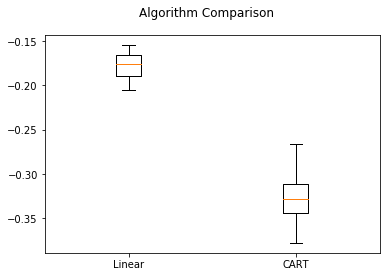

In [85]:
#Compare Algorithms
from matplotlib import pyplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Among these Linear Regression has lowest MSE and also less variation 

# Section 6. Deployment

### Predict a new value (new record) using Logistic Regression

In [587]:
new_application = {'Account Balance': 4,
 'Payment Status of Previous Credit': 4,
 'Age (years)': 30,
 'Duration of Credit (month)': 12,
 'Purpose': 2,
 'Credit Amount': 1000}

df2 = pd.DataFrame(new_application,
                   columns= ['Account Balance', 'Payment Status of Previous Credit',
                             'Age (years)', 'Duration of Credit (month)', 'Purpose','Credit Amount'], index=[0])
df2

,Account Balance,Payment Status of Previous Credit,Age (years),Duration of Credit (month),Purpose,Credit Amount
0,4,4,30,12,2,1000


In [588]:
y_pred=logistic_model.predict(df2)
print(y_pred)

[1]


So given above information, we predict this person is Creditworthy and should be given a loan

### Conclusion

Logistic Regression model gives : 84% prediction accuracy

Linear Regression model gives : 31%  prediction accuracy

Regression Tree model gives :   23%  prediction accuracy

The reason Linear Regression does not work is because the approach is to fit a linear model to the probability of the event.

● Probabilities can only take values between 0 and 1. Hence, we need a different approach to ensure that our model is appropriate for the data. 

Logistic regression is a statistical model that uses logistic function to model the conditional probability.

● In logistic regression, we do not directly fit a straight line to our data like in linear regression. Instead, we fit a S shaped curve, called Sigmoid, to our observations. 
 
Therefore we choose Logistic Regression Model for German Credit Prediction